Before you turn this problem in, make sure everything runs as expected. First, **restart the kernel** (in the menubar, select Kernel$\rightarrow$Restart) and then **run all cells** (in the menubar, select Cell$\rightarrow$Run All).

**NB. Do not add new or remove/cut cells in the notebook. Additionally, do not change the filename of this notebook.**

Make sure you fill in any place that says `YOUR CODE HERE` or "YOUR ANSWER HERE", as well as your student number below:

In [1]:
STUDENT_NUMBER = "141927"

---

# Exercise 3

## Exercise 3.1: A circuit of resistors (3 points)

Consider the following circuit of resistors:

<img src="resistor.png" width="300" />

All the resistors have the same resistance $R$. The power rail at the top
is at voltage $V_+=5\,$V. What are the other four voltages, $V_1$
to $V_4$?

To answer this question we use Ohm's law and the Kirchhoff current
law, which says that the total net current flow out of (or into) any
junction in a circuit must be zero.  Thus for the junction at
voltage $V_1$, for instance, we have

$$
{V_1-V_2\over R} + {V_1-V_3\over R} + {V_1-V_4\over R} + {V_1-V_+\over R}
= 0,
$$

or equivalently

$$
4V_1 - V_2 - V_3 - V_4 = V_+.
$$


1. Write similar equations for the other three junctions with unknown voltages.
2. Write a program to solve the four resulting equations using Gaussian elimination and hence find the four voltages.


## Solution 3.1

$\frac{V_3-V_+}{R} + \frac{V_3-V_1}{R} + \frac{V_3-V_4}{R} = 0 \quad \Leftrightarrow \quad 3V_3 - V_1 - V_4 = V_+$

$\frac{V_2-V_1}{R} + \frac{V_2-V_4}{R} + \frac{V_2-0}{R} = 0 \quad \Leftrightarrow \quad 3V_2 - V_1 - V_4 = 0$

$\frac{V_4-V_3}{R} + \frac{V_4-V_1}{R} + \frac{V_4-V_2}{R} + \frac{V_4-0}{R} = 0 \quad \Leftrightarrow \quad 4V_4 - V_1 - V_2 - V_3 = 0$

In [2]:
import numpy as np

def gausselim(A,v): 
    """ Gaussian elimination with backsubstitution
        A (2d float array): an NxN matrix
        v (1d float array): a length N vector
        returns the solution to the secular equation  A*x=v
    """
    # YOUR CODE HERE
    N = len(v)

    # Form an upper triangle by Gaussian elimination
    for m in range(N):
        # Divide the row by the diagonal value
        v[m] /= A[m,m]
        A[m] /= A[m,m]

        # Subtract the row from the lower rows
        for n in range(m+1,N):
            v[n] -= A[n,m]*v[m]
            A[n] -= A[n,m]*A[m]

    # Solve the equation by backsubstitution
    x = np.empty(N,float)
    for m in range(N-1,-1,-1):
        x[m] = v[m]
        for i in range(m+1,N):
            x[m] -= A[m,i]*x[i]
    
    return x
    #raise NotImplementedError()

In [3]:
## Exercise 3.1 part 2 validation
import numpy as np
A=np.array(((1,1),(1,-1)),dtype=float)
v=np.array(((2,0)),dtype=float)
assert(sum(gausselim(A,v))-2 < 1e-7)


## Exercise 3.2: Pivoting (2 points)

Modify your program from exercise 3.1 and introduce pivoting to solve the following equation

$$
\left(\begin{array}{cccc} 0 & 1 & 4 & 1 \\ 3 & 4 & -1 & -1 \\ 1 & -4 & 1 & 5 \\ 2 & -2 & 1 & 3 \end{array} \right) \left(\begin{array}{c} w \\ x \\ y \\ z\end{array} \right) = \left(\begin{array}{c} -4 \\ 3 \\ 9 \\ 7\end{array} \right)
$$

and show that it can find the solution to these as well, even though Gaussian elimination without pivoting fails.

In [4]:
import numpy as np

def gausselimpivot(A,v):
    """ Gaussian elinmation with pivoting 
    A (2d float array): an NxN matrix
    v (1d float array): a length N vector
    returns the solution to the secular equation  A*x=v  """
    # YOUR CODE HERE
    N = len(v)
    
    # Check if there are zeros on the diagonal
    for m in range(N):
        if A[m,m] == 0:
            # If zeros found, save the row temporarily
            tmp_A = A[m].copy()
            tmp_v = v[m].copy()
            # Find a lower row where the diagonal is not zero
            for n in range(m+1,N):
                if A[n,n] != 0:
                    # Swap the rows
                    A[m] = A[n]
                    v[m] = v[n]
                    A[n] = tmp_A
                    v[n] = tmp_v
                    break
    
    # Solve the equation with the corrected matrix
    return gausselim(A,v)
    #raise NotImplementedError()

A = np.array([[ 0,  1,  4,  1],
              [ 3,  4, -1, -1],
              [ 1, -4,  1,  5],
              [ 2, -2,  1,  3]], float)
v = np.array([-4, 3, 9, 7], float)

x = gausselimpivot(A,v)
x_np = np.linalg.solve(A,v)
print("My solve \tx =", x)
print("Numpy solve \tx =", x_np)

My solve 	x = [ 1.61904762 -0.42857143 -1.23809524  1.38095238]
Numpy solve 	x = [ 1.61904762 -0.42857143 -1.23809524  1.38095238]


In [5]:
import numpy as np
A=np.array(((0,1),(1,-1)),dtype=float)
v=np.array(((1,0)),dtype=float)
assert(sum(gausselimpivot(A,v))-2 < 1e-7)


## Exercise 3.3: LU decomposition (6 points)

LU decomposition with partial pivoting is the most widely used method for
the solution of simultaneous equations in practice.  Write your own program to solve 
simultaneous equations using LU decomposition.
1. Write a Python function that calculates the LU decomposition of a matrix. The calculation is the same as that for Gaussian
  elimination, except that at each step of the calculation you need to
  extract the appropriate elements of the matrix and assemble them to form
  the lower diagonal matrix $\mathbf{L}$. Test your function by
  calculating the LU decomposition of the following matrix 
  $$ 
  \left(\begin{array}{cccc} 2 & 1 & 4 & 1 \\ 3 & 4 & -1 & -1 \\ 1 & -4 & 1 & 5 \\ 2 & -2 & 1 & 3 \end{array} \right).
  $$
  Then multiply the $\mathbf{L}$ and $\mathbf{U}$ you get and verifying that you
  recover the original matrix.
2. Build on your LU decomposition function to create a complete program
  to solve the following equation:
   $$ 
   \left(\begin{array}{cccc} 2 & 1 & 4 & 1 \\ 3 & 4 & -1 & -1 \\ 1 & -4 & 1 & 5 \\ 2 & -2 & 1 & 3 \end{array} \right) \left(\begin{array}{c} w \\ x \\ y \\ z\end{array} \right) = \left(\begin{array}{c} -4 \\ 3 \\ 9 \\ 7\end{array} \right) .
   $$
  
  Perform a double backsubstitution as described
  in the lecture. Solve the same equation using the function
  `solve` from the `numpy` package (`linalg` module) and verify that you get the
  same answer either way.
3. Include partial pivoting in the LU decomposition. Partial pivoting works in the same way for LU
  decomposition as it does for Gaussian elimination, swapping rows to get
  the largest diagonal element as in Exercise 3.2, but the
  extension to LU decomposition requires two additional steps. First,
  every time you swap two rows you also have to swap the same rows in the
  matrix $\mathbf{L}$. Second, when you use your LU decomposition to solve a
  set of equations $\mathbf{A}\mathbf{x}=\mathbf{v}$ you will also need to perform
  the same sequence of swaps on the vector $\mathbf{v}$ on the right-hand
  side. This means you need to record the swaps as you are doing the
  decomposition so that you can recreate them later.  The simplest way to
  do this is to set up a list or array in which the value of the $i$th
  element records the row you swapped with on the $i$th step of the
  process.  For instance, if you swapped the first row with the second then
  the second with the fourth, the first two elements of the list would be 2
  and 4. Solving a set of equations for given $\mathbf{v}$ involves first
  performing the required sequence of swaps on the elements of $\mathbf{v}$
  then performing a double backsubstitution as usual. 

  Modify the function you wrote for part 3.3.1 to perform LU decomposition
  with partial pivoting. The function should return the matrices $\mathbf{L}$
  and $\mathbf{U}$ for the LU decomposition of the swapped matrix, plus a list
  of the swaps made. Then modify the rest of your program to solve
  equations of the form $\mathbf{A}\mathbf{x}=\mathbf{v}$ using LU decomposition
  with pivoting. Test your program on the example from Exercise 3.2, which
  cannot be solved without pivoting because of the zero in the first
  element of the matrix.  Check your results against a solution of the same
  equations using the `solve` function from `numpy`.





## Solution 3.3

In [6]:
# Part 1

import numpy as np

def LU(A):
    """ Function to perform an LU decomposition 
    A (2d float array): an NxN matrix
    returns L,U: NxN matrices such that L[i,j>i] = U[i,j<i] = 0 and L*U = A
    """        
    # YOUR CODE HERE
    N = A.shape[0]
    U = A.copy()
    L = np.zeros(A.shape)
   
    # Form the upper triangle by Gaussian elimination
    for m in range(N):
        # Divide the row by the diagonal value
        U[m] /= U[m,m]

        # Subtract the row from the lower rows
        for n in range(m+1,N):
            U[n] -= U[n,m]*U[m]
    
        # Form the lower triangle using the upper triangle and A
        for n in range(m+1):
            L[m,n] = A[m,n]  # start with a copy of a_mn
            for k in range(N):  # subtract the other elements l*u
                if k != n:
                    L[m,n] -= L[m,k]*U[k,n]
        
    return L,U
    #raise NotImplementedError()

A = np.array([[ 2,  1,  4,  1],
              [ 3,  4, -1, -1],
              [ 1, -4,  1,  5],
              [ 2, -2,  1,  3]], float)
N = A.shape[0]

L,U = LU(A)

# Test L*U = A
A_prime = np.zeros(A.shape)
for m in range(N):
    for n in range(N):
        for k in range(N):
            A_prime[m,n] += L[m,k]*U[k,n]
print("L*U and A are equal:", (A_prime == A).all())

L*U and A are equal: True


In [7]:
# part 2

# YOUR CODE HERE
def solve_by_LU(A,v):
    """Solve the system Ax = v using LU decomposition.
    Ax = LUx = Ly = v
    
    Returns:
        vector x
    """
    N = len(v)
    
    # First get L and U
    L,U = LU(A)
    
    # Then solve Ly = v by backsubstitution
    y = np.zeros(N,float)
    for m in range(N):
        y[m] = v[m]
        for n in range(m):
            y[m] -= L[m,n]*y[n]
        y[m] /= L[m,m]
    
    # Then solve Ux = y by another backsubstitution
    x = np.zeros(N,float)
    for m in range(N-1,-1,-1):
        x[m] = y[m]
        for n in range(m+1,N):
            x[m] -= U[m,n]*x[n]
    
    return x

A = np.array([[ 2,  1,  4,  1],
              [ 3,  4, -1, -1],
              [ 1, -4,  1,  5],
              [ 2, -2,  1,  3]], float)
v = np.array([-4, 3, 9, 7], float)

# Solve Ax = v
x = solve_by_LU(A,v)
x_np = np.linalg.solve(A,v)
print("My solve: \tx =", x)
print("Numpy solve: \tx =", x_np)
#raise NotImplementedError()

My solve: 	x = [ 2. -1. -2.  1.]
Numpy solve: 	x = [ 2. -1. -2.  1.]


In [8]:
# Part 3

# YOUR CODE HERE
def LU_with_pivoting(A):
    """Function to perform an LU decomposition
    A (2d float array): an NxN matrix
    returns L,U: NxN matrices such that L[i,j>i] = U[i,j<i] = 0 and L*U = A
    """
    N = A.shape[0]
    
    # Perform partial pivoting on matrix A
    swaps = []
    for m in range(N):
        if A[m,m] == 0:
            # If zeros found, save the row temporarily
            tmp_A = A[m].copy()
            # Find a lower row where the diagonal is not zero
            for n in range(m+1,N):
                if A[n,n] != 0:
                    # Swap the rows for both U and L
                    A[m] = A[n]
                    A[n] = tmp_A
                    swaps.append((m,n))
                    break
    
    U = A.copy()
    L = np.zeros(A.shape)
    
    # Form the upper triangle by Gaussian elimination
    i = 0
    for m in range(N):
        # Divide the row by the diagonal value
        U[m] /= U[m,m]

        # Subtract the row from the lower rows
        for n in range(m+1,N):
            U[n] -= U[n,m]*U[m]
    
        # Form the lower triangle using the upper triangle and A
        for n in range(m+1):
            L[m,n] = A[m,n]  # start with a copy of a_mn
            for k in range(N):  # subtract the other elements l*u
                if k != n:
                    L[m,n] -= L[m,k]*U[k,n]
   
    return L,U,swaps

def solve_by_LU_with_pivoting(A,v):
    """Solve the system Ax = v using LU decomposition.
    Ax = LUx = Ly = v
    
    Returns:
        vector x
    """
    N = len(v)
    
    # First get L and U
    L,U,swaps = LU_with_pivoting(A)
    
    # Perform the swaps for v
    for s in swaps:
        m,n = s
        tmp_v = v[m].copy()
        v[m] = v[n]
        v[n] = tmp_v
    
    # Then solve Ly = v by backsubstitution
    y = np.zeros(N,float)
    for m in range(N):
        y[m] = v[m]
        for n in range(m):
            y[m] -= L[m,n]*y[n]
        y[m] /= L[m,m]
    
    # Then solve Ux = y by another backsubstitution
    x = np.zeros(N,float)
    for m in range(N-1,-1,-1):
        x[m] = y[m]
        for n in range(m+1,N):
            x[m] -= U[m,n]*x[n]
            
    return x

A = np.array([[ 0,  1,  4,  1],
              [ 3,  4, -1, -1],
              [ 1, -4,  1,  5],
              [ 2, -2,  1,  3]], float)
v = np.array([-4, 3, 9, 7], float)

# Solve Ax = v
x = solve_by_LU_with_pivoting(A,v)
x_np = np.linalg.solve(A,v)
print(f"My solve: \tx = {x}")
print(f"Numpy solve: \tx = {x_np}")
#raise NotImplementedError()

My solve: 	x = [ 1.61904762 -0.42857143 -1.23809524  1.38095238]
Numpy solve: 	x = [ 1.61904762 -0.42857143 -1.23809524  1.38095238]


## Exercise 3.4: The QR algorithm (3 points)
In this exercise you will write a program to calculate the eigenvalues and eigenvectors of a real symmetric
matrix using the QR algorithm. The first challenge is to write a program
that finds the QR decomposition of a matrix. Then you will use that
decomposition to find the eigenvalues.

As described above, the QR decomposition expresses a real square
matrix $\mathbf{A}$ in the form $\mathbf{A}=\mathbf{Q}\mathbf{R}$, where $\mathbf{Q}$ is
an orthogonal matrix and $\mathbf{R}$ is an upper-triangular matrix.  Given an
$N\times N$ matrix $\mathbf{A}$ we can compute the QR decomposition as
follows.

Let us think of the matrix as a set of $N$ column
vectors $\mathbf{a}_0\ldots\mathbf{a}_{N-1}$ thus:
$$
\mathbf{A} = \begin{pmatrix}
            | & | & | & \cdots \\
            \mathbf{a}_0 & \mathbf{a}_1 & \mathbf{a}_2 & \cdots \\
            | & | & | & \cdots
          \end{pmatrix},
$$

where we have numbered the vectors in Python fashion, starting from zero,
which will be convenient when writing the program.  We now define two new
sets of vectors $\mathbf{u}_0\ldots\mathbf{u}_{N-1}$ and
$\mathbf{q}_0\ldots\mathbf{q}_{N-1}$ as follows:
\begin{align*}
\mathbf{u}_0 &= \mathbf{a}_0,
  & \mathbf{q}_0 = {\mathbf{u}_0\over|\mathbf{u}_0|}\,,\qquad \\
\mathbf{u}_1 &= \mathbf{a}_1 - (\mathbf{q}_0\cdot\mathbf{a}_1) \mathbf{q}_0,
  & \mathbf{q}_1 = {\mathbf{u}_1\over|\mathbf{u}_1|}\,, \qquad \\
\mathbf{u}_2 &= \mathbf{a}_2 - (\mathbf{q}_0\cdot\mathbf{a}_2) \mathbf{q}_0
             - (\mathbf{q}_1\cdot\mathbf{a}_2) \mathbf{q}_1,
  & \mathbf{q}_2 = {\mathbf{u}_2\over|\mathbf{u}_2|}\,, \qquad
\end{align*}
and so forth. The general formulas for calculating $\mathbf{u}_i$ and
$\mathbf{q}_i$ are
$$
\mathbf{u}_i = \mathbf{a}_i - \sum_{j=0}^{i-1} (\mathbf{q}_j\cdot\mathbf{a}_i)
            \mathbf{q}_j, \qquad
\mathbf{q}_i = {\mathbf{u}_i\over|\mathbf{u}_i|}.
$$

1. Show, by induction or otherwise, that the vectors $\mathbf{q}_i$ are orthonormal, i.e., that they satisfy
$$ 
  \mathbf{q}_i\cdot\mathbf{q}_j = \biggl\lbrace\begin{array}{ll}
                            1 & \quad\mbox{if $i=j$,} \\
                            0 & \quad\mbox{if $i\ne j$.}
                          \end{array}
$$

Now, rearranging the definitions of the vectors, we have
\begin{align*}
\mathbf{a}_0 &= |\mathbf{u}_0|\,\mathbf{q}_0, \\
\mathbf{a}_1 &= |\mathbf{u}_1|\,\mathbf{q}_1 + (\mathbf{q}_0\cdot\mathbf{a}_1) \mathbf{q}_0, \\
\mathbf{a}_2 &= |\mathbf{u}_2|\,\mathbf{q}_2 + (\mathbf{q}_0\cdot\mathbf{a}_2) \mathbf{q}_0
              + (\mathbf{q}_1\cdot\mathbf{a}_2) \mathbf{q}_1,
\end{align*}

  and so on. Or we can group the vectors $\mathbf{q}_i$ together as the columns of a matrix and write all of these equations as a single matrix equation

  $$
  \mathbf{A} = \begin{pmatrix}
            | & | & | & \cdots \\
            \mathbf{a}_0 & \mathbf{a}_1 & \mathbf{a}_2 & \cdots \\
            | & | & | & \cdots
          \end{pmatrix}
  =
  \begin{pmatrix}
    | & | & | & \cdots \\
   \mathbf{q}_0 & \mathbf{q}_1 & \mathbf{q}_2 & \cdots \\
   | & | & | & \cdots
  \end{pmatrix}
  \begin{pmatrix}
   |\mathbf{u}_0| & \mathbf{q}_0\cdot\mathbf{a}_1 & \mathbf{q}_0\cdot\mathbf{a}_2 & \cdots \\
    0           & |\mathbf{u}_1| & \mathbf{q}_1\cdot\mathbf{a}_2 & \cdots \\   
    0           & 0           & |\mathbf{u}_2| & \cdots
   \end{pmatrix}.
  $$

  Notice now that the first matrix on the right-hand side of this equation, the matrix with columns $\mathbf{q}_i$, is orthogonal, because the vectors       $\mathbf{q}_i$ are orthonormal, and the second matrix is upper triangular. In other words, we have found the QR decomposition $\mathbf{A}=\mathbf{Q}\mathbf{R}$. The matrices $\mathbf{Q}$ and $\mathbf{R}$ are

$$
\mathbf{Q} =
\begin{pmatrix}
  | & | & | & \cdots \\
  \mathbf{q}_0 & \mathbf{q}_1 & \mathbf{q}_2 & \cdots \\
  | & | & | & \cdots
\end{pmatrix}
,\qquad
\mathbf{R} =
\begin{pmatrix}
|\mathbf{u}_0| & \mathbf{q}_0\cdot\mathbf{a}_1 & \mathbf{q}_0\cdot\mathbf{a}_2 & \cdots \\
0           & |\mathbf{u}_1| & \mathbf{q}_1\cdot\mathbf{a}_2 & \cdots \\
0           & 0           & |\mathbf{u}_2| & \cdots
\end{pmatrix}.
$$

2. Write a Python function that takes as its argument a real square
  matrix $\mathbf{A}$ and returns the two matrices $\mathbf{Q}$ and $\mathbf{R}$
  that form its QR decomposition.  As a test case, try out your function on
  the matrix below and check the results by multiplying $\mathbf{Q}$ and $\mathbf{R}$ together to
  recover the original matrix $\mathbf{A}$ again.
  
$$
\mathbf{A} = \begin{pmatrix}
            1 & 4 & 8 & 4 \\
            4 & 2 & 3 & 7 \\
            8 & 3 & 6 & 9 \\
            4 & 7 & 9 & 2
          \end{pmatrix}.
$$

3. Using your function, write a complete program to calculate the
  eigenvalues and eigenvectors of a real symmetric matrix using the QR
  algorithm.  Continue the calculation until the magnitude of every
  off-diagonal element of the matrix is smaller than $10^{-6}$. When your are done the diagonal elements of $\mathbf{A}$ contain the eigenvalues and the columns   of $\mathbf{V}$ contain the eigenvectors. Test your  program on the example matrix above. You should find that the
  eigenvalues are $1$, $21$, $-3$, and $-8$.


## Solution 3.4

1.) Show that the vectors $\mathbf{q}_i$ are orthonormal.

Using the norm
$$|u_i| = \sqrt{\sum_j u_{ij}^2}$$
and the dot product
$$(q_i \cdot q_j) = \sum_k q_{ik} q_{jk}$$
we see that for every $i = j = k$
\begin{align*}
q_k \cdot q_k &= \frac{u_k}{|u_k|} \cdot \frac{u_k}{|u_k|}\\
&= \frac{1}{|u_k|^2} (u_k \cdot u_k)\\
&= \frac{1}{\sum_l u_{kl}^2} \sum_l u_{kl} u_{kl}\\
&= 1
\end{align*}

In the case when $i = 0$ and $j = 1$, the dot product is
\begin{align*}
q_0 \cdot q_1 &= q_0 \cdot \frac{u_1}{|u_1|}\\
&= q_0 \cdot \left( a_1 - (q_0 \cdot a_1) q_0 \right) \frac{1}{|u_1|}\\
&= \left[ (q_0 \cdot a_1) - (q_0 \cdot a_1) (q_0 \cdot q_0) \right] \frac{1}{|u_1|}\\
&= \left[ (q_0 \cdot a_1) - (q_0 \cdot a_1) \right] \frac{1}{|u_1|}\\
&= 0
\end{align*}

In a case where $i = 1$ and $j = 2$, we have
\begin{align*}
q_1 \cdot q_2 &= q_1 \cdot \frac{u_2}{|u_2|}\\
&= q_1 \cdot \left[ a_2 - (q_0 \cdot a_2) q_0 - (q_1 \cdot a_2) q_1 \right] \frac{1}{|u_2|}\\
&= \left[ (q_1 \cdot a_2) - (q_0 \cdot a_2) (q_1 \cdot q_0) - (q_1 \cdot a_2) (q_1 \cdot q_1) \right] \frac{1}{|u_2|}
\end{align*}
and because we already know that $q_i \cdot q_i = 1$ and $q_0 \cdot q_1 = 0$, and because dot products are revertable (meaning that $q_1 \cdot q_0 = q_0 \cdot q_1$), this becomes $$= \left[ (q_1 \cdot a_2) - (q_1 \cdot a_2) \right] \frac{1}{|u_2|} = 0$$

Next, we consider an incrementation in the indices separation, i.e., $i = 1$ and $j = 3$:
\begin{align*}
q_1 \cdot q_3 &= q_1 \cdot \left[ a_3 - (q_0 \cdot a_3) q_0 - (q_1 \cdot a_3) q_1 - (q_2 \cdot a_3) q_2 \right] \frac{1}{|u_3|}\\
&= \left[ (q_1 \cdot a_3) - (q_0 \cdot a_3) (q_0 \cdot q_1) - (q_1 \cdot a_3) (q_1 \cdot q_1) - (q_2 \cdot a_3) (q_2 \cdot q_1) \right] \frac{1}{|u_3|}
\end{align*}
and because we know that all products $q_i \cdot q_j$, where $i = j \pm 1$, are zero, we can see that the only terms left are the ones that cancel each other out: $$\left[ (q_1 \cdot a_3) - (q_1 \cdot a_3) \right] \frac{1}{|u_3|} = 0$$

Hence, we know that incrementing the index separation by one, i.e., $j = j + 1$, when $i < j$, all the other terms, expect where $i = j$ will cancel out, and the result is zero.

2.) Program for QR decomposition of Matrix A

In [9]:
# YOUR CODE HERE
import numpy as np

def QR_decomp(A):
    """Get the QR decomposition of a matrix A"""
    
    m,n = A.shape  # store dimensions of A
    Q = A.copy()  # start Q with a copy of A
    R = np.zeros((n,n))  # R is an (n x n) shaped matrix
    
    # Iterate over the columns in A and form matrix Q
    for i in range(n):
        R[i,i] = np.linalg.norm(Q[:,i])  # norm of column i in Q: sqrt(sum(q_i^2))
        Q[:,i] /= R[i,i]  # normalize column q_i
        for j in range(i+1,n):
            R[i,j] = np.dot(Q[:,j], Q[:,i])  # R_ij = q_i * a_j
            Q[:,j] -= R[i,j] * Q[:,i]  # orhogonalize the j'th column
   
    return Q,R

A = np.array([[1, 4, 8, 4],
              [4, 2, 3, 7],
              [8, 3, 6, 9],
              [4, 7, 9, 2]], float)

Q,R = QR_decomp(A)

print("A:\n", A)
print("\nQ: \n", Q)
#print("\nQT * Q:\n", np.matmul(Q.T,Q))
print("\nR:\n", R)
print("\nQ * R:\n", np.matmul(Q,R))
print("\nA and QR are equal:", (A - np.matmul(Q,R) < 1e-14).all())
#raise NotImplementedError()

A:
 [[1. 4. 8. 4.]
 [4. 2. 3. 7.]
 [8. 3. 6. 9.]
 [4. 7. 9. 2.]]

Q: 
 [[ 0.10153462  0.558463    0.80981107  0.1483773 ]
 [ 0.40613847 -0.10686638 -0.14147555  0.8964462 ]
 [ 0.81227693 -0.38092692  0.22995024 -0.37712564]
 [ 0.40613847  0.72910447 -0.5208777  -0.17928924]]

R:
 [[ 9.8488578   6.49821546 10.55960012 11.37187705]
 [ 0.          5.98106979  8.4234836  -0.484346  ]
 [ 0.          0.          2.74586406  3.27671222]
 [ 0.          0.          0.          3.11592335]]

Q * R:
 [[1. 4. 8. 4.]
 [4. 2. 3. 7.]
 [8. 3. 6. 9.]
 [4. 7. 9. 2.]]

A and QR are equal: True


3.) Complete program for calculating eigenvalues and eigenvectors

In [10]:
# YOUR CODE HERE
def check_off_diagonals(A, lim=1e-6):
    n,m = A.shape
    converged = True
    
    for i in range(n):
        for j in range(m):
            if i != j and A[i,j] > lim:
                converged = False
                break
        if not converged:
            break
    
    return converged

A = np.array([[1, 4, 8, 4],
              [4, 2, 3, 7],
              [8, 3, 6, 9],
              [4, 7, 9, 2]], float)

converged = False
count = 0
while not converged:
    Q,R = QR_decomp(A)
    A = np.matmul(R,Q)
    converged = check_off_diagonals(A)
    count += 1

print("Converged after", count, " iterations")
print("A:\n",A)
print("\nThe eigenvalues are:", A.diagonal())
#raise NotImplementedError()

Converged after 18  iterations
A:
 [[ 2.10000000e+01  7.36068002e-07  3.08094126e-14 -2.43141334e-14]
 [ 7.36067998e-07 -8.00000000e+00  5.99038973e-08  7.55018986e-15]
 [ 1.76373367e-14  5.99038974e-08 -3.00000000e+00 -2.06493957e-08]
 [ 5.69063112e-23  9.58659066e-16 -2.06493983e-08  1.00000000e+00]]

The eigenvalues are: [21. -8. -3.  1.]


## Exercise 3.5: Relaxation method (2 points)

Consider the equation $x = 1 - \mathrm{e}^{-cx}$, where $c$ is a known
parameter and $x$ is unknown.  This equation arises in a variety of
situations, including the physics of contact processes, mathematical models
of epidemics, and the theory of random graphs.
Write a program to solve this equation for $x$ using the relaxation
method for values of $c$ from 0.01 to 3 in steps of 0.01 . Calculate your solution to an accuracy of at
least $10^{-6}$. Make a plot of $x$ as a function of $c$. You
should see a clear transition from a regime in which $x=0$ to a regime of
nonzero $x$. This is another example of a phase transition. In physics
this transition is known as the percolation transition; in epidemiology it is the epidemic threshold.

<b>Hint:</b> The expression for the error is

$$
 \mathrm{error} = \frac{x-x'}{1-1/f'(x)}
$$

where $x$ is the current estimate and $x'$ the old one.


<ipython-input-11-e50f1d7c525b>:11: RuntimeWarning: divide by zero encountered in true_divide
  error = lambda x,x_prime: (x-x_prime) / (1-1/f_prime(x))


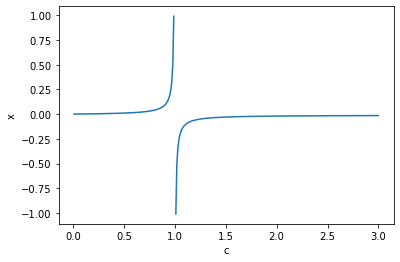

In [11]:
# YOUR CODE HERE
import numpy as np
from matplotlib import pyplot as plt

def relax(c):
    """Calculate x = 1 - exp(-cx) with the relaxation method."""
    
    # Helper functions for f' and the error
    f_prime = lambda x: c*np.exp(-c*x)
    error = lambda x,x_prime: (x-x_prime) / (1-1/f_prime(x))
    
    # Initialize x as and empty array
    x = np.zeros(c.shape)
    
    # Initial value for the error
    err = error(x,0.01)
    
    # Iterate until x converges
    while (err >= 1e-6).any():
        x_prime = x             # previous x
        x = x+err               # current x
        err = error(x,x_prime)  # update error
    
    return x

c = np.arange(0.01, 3.01, 0.01)
x = relax(c)

plt.plot(c,x)
plt.xlabel("c")
plt.ylabel("x")
plt.show()
#raise NotImplementedError()

## Exercise 3.6: Finding the roots of a polynomial with Newton method (2 points)

Consider the sixth-order polynomial
$$
P(x) = 924 x^6 - 2772 x^5 + 3150 x^4 - 1680 x^3 + 420 x^2 - 42 x + 1.
$$
There is no general formula for the roots of a sixth-order polynomial, but
one can find them easily enough using a computer.
1. Make a plot of $P(x)$ from $x=0$ to $x=1$ and by inspecting it find
  rough values for the six roots of the polynomial---the points at which
  the function is zero.
2. Write a Python program to solve for the positions of all six roots to
   at least ten decimal places of accuracy, using Newton's method.

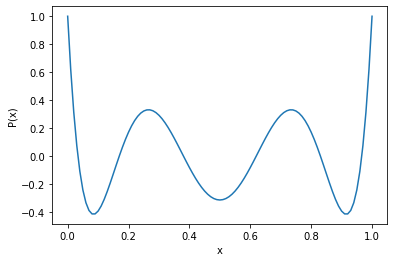

The roots of P(x) are approximately at x = 0.03, 0.17, 0.4, 0.6, 0.82, and 0.95


In [12]:
# Part 1
# YOUR CODE HERE
import numpy as np
from matplotlib import pyplot as plt

P = lambda x: 924*x**6 - 2772*x**5 + 3150*x**4 - 1680*x**3 + 420*x**2 - 42*x + 1
x = np.arange(0, 1.01, 0.01)

plt.plot(x, P(x))
plt.xlabel("x")
plt.ylabel("P(x)")
plt.show()
print("The roots of P(x) are approximately at x = 0.03, 0.17, 0.4, 0.6, 0.82, and 0.95")
#raise NotImplementedError()

In [13]:
# Part 2
# YOUR CODE HERE
roots = [0.03, 0.17, 0.4, 0.6, 0.82, 0.95]
tolerance = 1e-12

# Helper function P'(x)
P_prime = lambda x: 5544*x**5 - 13860*x**4 + 12600*x**3 - 5040*x**2 + 840*x - 42

# Find each root
for i in range(len(roots)):
    # Initialize x_0 as the initial guess
    x0 = roots[i]
    # Calculate the first x_1 = x_0 - f(x)/f'(x)
    x1 = x0 - P(x0)/P_prime(x0)
    # Iterate until converges
    while abs(x1 - x0) >= tolerance:
        x0 = x1  # update old x
        x1 = x0 - P(x0) / P_prime(x0)  # calculate new x
    roots[i] = x0  # save root
    print(f"Found root #{i+1}: {x0}")
        
#raise NotImplementedError()

Found root #1: 0.03376524289842399
Found root #2: 0.16939530676686768
Found root #3: 0.3806904069583867
Found root #4: 0.6193095930416064
Found root #5: 0.8306046932333768
Found root #6: 0.966234757101586
